-----

------

# ¿Cuáles son los juegos más exitosos?

Esta es un ejercicio que se realizó para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Para desarrollarlo tuve que identificar patrones para determinar si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

La serie de datos se remonta a 2016. 
Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Pasos a seguir:

1. Cargar los archivos y las librerías con las que voy a trabajar
2. Diagnósticos de los datos
3. Procesamiento de los datos
4. Análisis de la información
5. Perfil por región
6. Pruebas de hipótesis
7. Conclusión general

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [2]:
# Cargar el archivo
games = pd.read_csv('/datasets/games.csv')

## Diagnóstico inicial de los datos

In [3]:
# Información general/resumida sobre el DataFrame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Un ejemplo
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7106,NBA ShootOut 2003,PS2,2002.0,Sports,0.11,0.09,0.00,0.03,62.0,5.9,E
10641,Gekido,PS,1999.0,Fighting,0.06,0.04,0.00,0.01,NaN,NaN,NaN
15764,Moe Star: Moeru Toudai Eigojuku,DS,2008.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
12168,Shin Lucky * Star: Moe Drill ~Tabidachi~,DS,2007.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
10420,Taiko no Tatsujin: V Version,PSV,2015.0,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN
14735,Wrestle Angels: Survivor 2,PS2,2008.0,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,NaN
13035,Ultra Bust-A-Move,XB,2004.0,Puzzle,0.04,0.01,0.00,0.00,74.0,tbd,E
7358,Viewtiful Joe 2,PS2,2004.0,Action,0.10,0.08,0.00,0.03,85.0,7.7,T
15679,Germany's Next Topmodel 2011,Wii,2011.0,Simulation,0.00,0.02,0.00,0.00,NaN,NaN,NaN
11286,Famicom Mini: Famicom Mukashi Banashi - Shin O...,GBA,2004.0,Adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN


In [5]:
#Imprimir la columna de plataforma para ver qué contiene
games['Platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

Los nombres de las plataformas están muy desagrupados. Se podría conglomerar en diversas categorías para evitar tener tantos.

In [6]:
#Imprimir la columna 'genre' para ver qué contiene
games['Genre'].value_counts().sort_index()

Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: Genre, dtype: int64

De momento parece que todo bien

In [7]:
#Imprimir la columna de Rating para ver qué contiene
games['Rating'].value_counts().sort_index()

AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: Rating, dtype: int64

Los nombres de esas categorías están difíciles de entender para un público que no sea conocedor de videojuegos. Los cambiaré para que sean más entendibles.

In [8]:
#Imprimir la columna de User_score para ver qué contiene
games['User_Score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: User_Score, Length: 96, dtype: int64

In [9]:
#Imprimir la columna de critic_score para ver qué contiene
games['Critic_Score'].value_counts().sort_index()

13.0     1
17.0     1
19.0     6
20.0     3
21.0     1
        ..
94.0    37
95.0    16
96.0    18
97.0    11
98.0     4
Name: Critic_Score, Length: 82, dtype: int64

Estas columnas están midiendo la puntuación de cada videojuego, pero en diferente escala. Voy a homologar para que ambas estén en la misma escala y podamos comparar más fácilmente. 

## Corregir datos

**Plan de trabajo:**

1. Cambiar los nombres a minúsculas.
2. Columna name:
   * Homologar los nombres en minúsculas, quitar espacios y caracteres especiales.
   * Verificar valores perdidos y reemplazarlos.
3. Columna platform:
   * Agrupar en categorías más grandes y crear una nueva columna
4. Columna year_of_release
   * Verificar valores ausentes
   * Cambiar el type a entero
5. Columna genre
   * Verificar valores ausentes
6. Columna user_score
   * Quitar el 'tbd'
   * Verificar valores ausentes
   * Cambiar el type a float
   * Igualar escala con columna 'critic_score'
7. Columna_rating
   * Crear una nueva columna para una mejor descripción
   * Verificar valores ausentes
8. Columnas de 'sales'
   * Verificar valores ausentes y reemplazar por '0'
9. Generar una nueva columna total_sales
10. Revisar duplicados

#### **1. Cambiar columnas a minúsculas**

In [10]:
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### **2. Trabajar con la columna name**

In [11]:
#imprimir un ejemplo para ver cómo vienen los datos
games['name'].sample(10)

8875          Major League Baseball 2K12
8190        Back to the Future: The Game
8824     FIFA 06: Road to FIFA World Cup
5547      Discovery Kids: Puppy Playtime
6819          Lunar: Silver Star Harmony
11895      Tak: The Great Juju Challenge
13978                     Minna no Chizu
9804                             McDROID
7033          Tetris 2 (weekly jp sales)
14429         Chaos;Head - Love Chu*Chu!
Name: name, dtype: object

In [12]:
#Para poder trabajar mejor con los datos, cambiaré todos los nombres a minúsculas
games['name'] = games['name'].str.lower()

In [13]:
#Quitar espacios y caracteres especiales
games['name'] = games['name'].str.strip()
games['name'] = games['name'].str.replace(r'[^\w\s]+','')

In [14]:
#Imprimir un ejemplo
games['name'].value_counts().sort_values(ascending=False)

need for speed most wanted             12
fifa 14                                 9
ratatouille                             9
madden nfl 07                           9
lego marvel super heroes                9
                                       ..
puella magi madoka magica portable      1
battlefield 2 modern combatjp sales     1
kinnikuman muscle grand prix max        1
the 7th guest                           1
are you smarter than a 5th grader       1
Name: name, Length: 11536, dtype: int64

In [15]:
#Verificar valores perdidos
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
#Reemplazar los valores perdidos por "not defined"
games['name'] = games['name'].fillna('not defined')

He decidido cambiar los valores perdidos por 'not defined' porque parece lo más conveniente al ser solo 2 valores. 

#### **3. Trabajar con la columna platform**

In [17]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
#Función para agrupar en categorías a las diferentes plataformas:
def fun_plataform (x):
    if x in ['3DS','DS','GB','GBA','GC','N64','NES','SNES','Wii','WiiU']:
        return "Nintendo"
    elif x in ['PC','PCFX']:
        return "PC"
    elif x in ['PS','PS2','PS3','PS4','PSP','PSV']:
        return "PlayStation"
    elif x in ['X360','XB','XOne']:
        return "XBox"
    elif x in ['GEN', 'SCD', 'SAT', 'GG', 'DC']:
        return "Sega"
    else:
        return "Other"

In [19]:
#aplicar la función y crear una nueva columna
games['platform_group'] = games['platform'].apply(fun_plataform)
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
13055,tna impact cross the line,PSP,2010.0,Fighting,0.05,0.00,0.00,0.00,50.0,6.5,T,PlayStation
9649,puella magi madoka magica portable,PSP,2012.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,NaN,PlayStation
5173,super fire prowrestling special,SNES,1994.0,Fighting,0.00,0.00,0.36,0.00,NaN,NaN,NaN,Nintendo
10651,tom clancys splinter cell,GBA,2003.0,Action,0.07,0.03,0.00,0.00,77.0,8.6,T,Nintendo
6345,mat hoffmans pro bmx,GBA,2001.0,Sports,0.19,0.07,0.00,0.00,71.0,tbd,E,Nintendo
8785,michael jackson the experience,PSP,2010.0,Misc,0.11,0.03,0.00,0.02,NaN,6.2,E10+,PlayStation
13159,all star tennis 99,N64,1999.0,Sports,0.04,0.01,0.00,0.00,NaN,NaN,NaN,Nintendo
9731,major league baseball 2k8 fantasy allstars,DS,2008.0,Sports,0.11,0.00,0.00,0.01,59.0,7,E,Nintendo
1710,injustice gods among us,PS3,2013.0,Fighting,0.48,0.50,0.01,0.20,78.0,7.9,T,PlayStation
15736,haneru no tobira wii girigirissu,Wii,2007.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN,Nintendo


In [20]:
#Cuántos hay por categoría:
games['platform_group'].value_counts()

PlayStation    6720
Nintendo       6270
XBox           2333
PC              975
Sega            261
Other           156
Name: platform_group, dtype: int64

#### **4. Trabajar con la columna 'year_of_release'**

In [21]:
games['year_of_release'].isna().sum()

269

In [22]:
#hay algunos valores ausentes
games = games.dropna(subset = ['year_of_release'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


Decidí eliminar los valores ausentes de esta columna, ya que eran muy poquitos y no parecía afectar mi análisis general. 

In [23]:
#convertir a tipo 'entero' en vez de 'float'
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [24]:
games['year_of_release'].sample(5)

13957    2006
11390    2012
12076    2008
2507     2007
14656    2007
Name: year_of_release, dtype: int64

#### **5. Trabajar con la columna 'genre'**

In [25]:
#Buscar valores ausentes
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
659,not defined,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,Sega
14244,not defined,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Sega


In [26]:
#Vemos que coincide con los valores ausentes de la columna 'name'

In [27]:
#Voy a imputar 'not defined' también para estos valores ausentes
games['genre'] = games['genre'].fillna('not defined')

In [28]:
#Contar cuántos hay por categoría
games['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
not defined        2
Name: genre, dtype: int64

Decidí imputar con 'not defined' ya que su type es 'object'. Es lo más conveniente en estos casos. Además, coincide con los juegos que tampoco tienen nombre, pero cómo sí tienen ventas, no parece conveniente eliminar estas filas. 

#### **6. Trabajar con la columna 'user_score'**

In [29]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Esta columna tiene varios valores ausentes, así como un 'tbd' (to be determined). Vamos a cambiar esto porque eso sí puede afectar nuestro análisis.

In [30]:
#Voy a reemblazar el 'tbd' por nan, como valor ausente
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [31]:
#comprobar
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [32]:
#Convertir el type a 'float' desde 'object'
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Más de la mitad de los valores de esta columna, están ausentes. Son demasiados para eliminarlos y tampoco podemos imputar un cero, ya que podría tener una connotación errónea dada la categoría de datos de esta columna. Por lo tanto, los dejaré así.
Es probable que existan muchos valores ausentes, ya que no todos los usuarios de video juegos se toman el tiempo para calificarlos. 

In [33]:
#Estandarizar los valores a 100 para empatarlos con la columna de 'critic score'
games['user_score'] = games['user_score']*10
games['user_score'].sample(10)

933       NaN
11585    75.0
4436      NaN
14537    83.0
13277     NaN
11003     NaN
558      59.0
552      32.0
8703      NaN
6896     91.0
Name: user_score, dtype: float64

In [34]:
#evaluar la columna para ver sus principales estadísticos
games['user_score'].describe().round(1)

count    7463.0
mean       71.3
std        15.0
min         0.0
25%        64.0
50%        75.0
75%        82.0
max        97.0
Name: user_score, dtype: float64

In [35]:
#compararlo con la columna 'critic score' para ver qué tan parecidos son
games['critic_score'].describe().round(1)

count    7983.0
mean       69.0
std        13.9
min        13.0
25%        60.0
50%        71.0
75%        79.0
max        98.0
Name: critic_score, dtype: float64

Las columnas tienen aprox el mismo número de valores. La puntuación mínima entre los usuarios es cero, mientras que entre los críticos es 13, probablemente porque los usuarios son más rigidos a la hora de calificar algo, mientras que los críticos consideran más variables.
La columna de 'critic score' tiene menor dispersión, es decir, los valores están más agrupados en torno a la media. 

#### **7. Trabajar con la columna 'rating'**

In [36]:
#Crear una función para cambiar el nombre a algo más comprensible
def fun_rating (x):
    if x == "E" or x == "K-A":
        return "Everyone"
    elif x == "T":
        return "Teens 13+"
    elif x == "M":
        return "Mature 17+"
    elif x == "E10+":
        return "Everyone 10+"
    elif x == "EC":
        return "Early Childhood"
    elif x == "RP":
        return "Pending"
    elif x == "AO":
        return "Adults Only"
    else:
        return "Pending"

In [37]:
games['rating_description'] = games['rating'].apply(fun_rating)
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_description
10045,tom clancys rainbow six rogue spear,GBA,2002,Shooter,0.08,0.03,0.0,0.00,76.0,NaN,T,Nintendo,Teens 13+
9524,alter echo,PS2,2003,Shooter,0.06,0.05,0.0,0.02,62.0,70.0,T,PlayStation,Teens 13+
4188,pirates of the caribbean dead mans chest,GBA,2006,Adventure,0.33,0.12,0.0,0.01,70.0,56.0,E10+,Nintendo,Everyone 10+
7295,dark summit,PS2,2001,Sports,0.11,0.08,0.0,0.03,67.0,NaN,T,PlayStation,Teens 13+
3169,lemony snickets a series of unfortunate events,PS2,2004,Platform,0.31,0.24,0.0,0.08,63.0,57.0,E,PlayStation,Everyone
15723,voodoo chronicles first sign,PC,2011,Adventure,0.02,0.00,0.0,0.00,NaN,NaN,NaN,PC,Pending
11836,bomberman max 2 red advance,GBA,2002,Puzzle,0.05,0.02,0.0,0.00,75.0,NaN,E,Nintendo,Everyone
15824,wild west shootout,Wii,2010,Shooter,0.01,0.01,0.0,0.00,NaN,NaN,T,Nintendo,Teens 13+
3249,xgra extreme gracing association,PS2,2004,Racing,0.30,0.24,0.0,0.08,68.0,86.0,T,PlayStation,Teens 13+
9483,transformers prime,WiiU,2012,Action,0.09,0.03,0.0,0.01,NaN,NaN,NaN,Nintendo,Pending


In [38]:
#contar por nueva categoría de ratings
games['rating_description'].value_counts()

Pending            6679
Everyone           3924
Teens 13+          2905
Mature 17+         1536
Everyone 10+       1393
Early Childhood       8
Adults Only           1
Name: rating_description, dtype: int64

Hay muchos videojuegos que no están clasificados, esto podría ser porque tal vez todavía no han sido clasificados, pero también puede ser un error por datos faltantes o mal registrados.

In [39]:
# Valores realmente ausentes
games['rating'].isna().sum()             

6678

Bien, ahora veo que la gran mayoría eran valores ausentes. De cualquier forma, hace sentido que se queden como 'pending'

In [40]:
games['rating'] = games['rating'].fillna('Pending')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16446 non-null  object 
 1   platform            16446 non-null  object 
 2   year_of_release     16446 non-null  int64  
 3   genre               16446 non-null  object 
 4   na_sales            16446 non-null  float64
 5   eu_sales            16446 non-null  float64
 6   jp_sales            16446 non-null  float64
 7   other_sales         16446 non-null  float64
 8   critic_score        7983 non-null   float64
 9   user_score          7463 non-null   float64
 10  rating              16446 non-null  object 
 11  platform_group      16446 non-null  object 
 12  rating_description  16446 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.8+ MB


#### **8. Verificar valores ausentes en las columnas de 'sales'**

In [41]:
print(games[['na_sales', 'eu_sales', 'jp_sales']].isna().sum())

na_sales    0
eu_sales    0
jp_sales    0
dtype: int64


Ya sabíamos que no había valores ausentes, pero consideré importante verificarlo por columna.

#### **9. Generar una nueva columna llamada 'ventas totales'**

In [42]:
#sumar las ventas de las 4 zonas y agruparlas en una nueva variable
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [43]:
#imprimir una muestra
games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_description,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,Nintendo,Everyone,82.54
1,super mario bros,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Pending,Nintendo,Pending,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,Nintendo,Everyone,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,Nintendo,Everyone,32.77
4,pokemon redpokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Pending,Nintendo,Pending,31.38
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Pending,Nintendo,Pending,30.26
6,new super mario bros,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,Nintendo,Everyone,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,Nintendo,Everyone,28.91
8,new super mario bros wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,Nintendo,Everyone,28.32
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Pending,Nintendo,Pending,28.31


In [44]:
#reordenar las columnas para que el DF tenga más sentido:
new_column_order = [
    'name', 'platform', 'platform_group', 'year_of_release', 'genre',
    'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales',
    'critic_score', 'user_score', 'rating', 'rating_description'
]

#reasignar
games = games[new_column_order]

In [45]:
#mostrar un ejemplo
games.head()

,name,platform,platform_group,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_description
0,wii sports,Wii,Nintendo,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E,Everyone
1,super mario bros,NES,Nintendo,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Pending,Pending
2,mario kart wii,Wii,Nintendo,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E,Everyone
3,wii sports resort,Wii,Nintendo,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E,Everyone
4,pokemon redpokemon blue,GB,Nintendo,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,Pending,Pending


#### **10. Revisar duplicados**

In [46]:
games.duplicated().sum()

0

Parece que no hay duplicados en nuestro DF, pero ahora revisaré por columnas

In [47]:
#Revisar si la columna 'name' con 'platform' se duplican algunos juegos
games[['name', 'platform']].duplicated().sum()

5

In [48]:
#Son 5! Veamos cuáles son esos juegos que se están duplicando
games[games[['name', 'platform']].duplicated(keep=False)]

,name,platform,platform_group,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,rating_description
604,madden nfl 13,PS3,PlayStation,2012,Sports,2.11,0.22,0.00,0.23,2.56,83.0,55.0,E,Everyone
659,not defined,GEN,Sega,1993,not defined,1.78,0.53,0.00,0.08,2.39,NaN,NaN,Pending,Pending
1190,need for speed most wanted,X360,XBox,2012,Racing,0.62,0.78,0.01,0.15,1.56,83.0,85.0,T,Teens 13+
1591,need for speed most wanted,X360,XBox,2005,Racing,1.00,0.13,0.02,0.10,1.25,83.0,85.0,T,Teens 13+
2523,dragon warrior iii,GB,Nintendo,2000,Role-Playing,0.00,0.00,0.81,0.00,0.81,NaN,NaN,Pending,Pending
2660,dragon warrior iii,GB,Nintendo,1999,Role-Playing,0.00,0.00,0.77,0.00,0.77,NaN,NaN,Pending,Pending
5972,need for speed most wanted,PC,PC,2005,Racing,0.02,0.23,0.00,0.04,0.29,82.0,85.0,T,Teens 13+
11715,need for speed most wanted,PC,PC,2012,Racing,0.00,0.06,0.00,0.02,0.08,82.0,85.0,T,Teens 13+
14244,not defined,GEN,Sega,1993,not defined,0.00,0.00,0.03,0.00,0.03,NaN,NaN,Pending,Pending
16230,madden nfl 13,PS3,PlayStation,2012,Sports,0.00,0.01,0.00,0.00,0.01,83.0,55.0,E,Everyone


Bien, aquí lo que se muestra es que aunque el nombre es igual, el año es distinto, probablemente son remakes o relanzamientos de los juegos. Aunque no deberían ser considerados como duplicados, ya que se trata de versiones diferentes, en realidad son tan poquitos que realmente no creo que valga la pena dejarlos. 

In [49]:
#removeré los duplicados quedandome solo con los de las ventas más altas
games = games.sort_values(by='total_sales', ascending=False)
games = games.drop_duplicates(subset=['name', 'platform'], keep='first')

In [50]:
#comprobar
games[['name', 'platform']].duplicated().sum()

0

## **Análisis de datos**

1.  Evaluar las ventas por plataforma para cada región (NA, UE, JP) .
2.  Encontrar los cinco géneros más y los menos rentables.
3.  Evalúa si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
4.  Cuántos juegos fueron lanzados en diferentes años.
5.  Evalúa las ventas totales por plataforma para saber cuál es la más rentable.
6.  Determina si las reseñas de usuarios y profesionales afectan las ventas.

In [51]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16709
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16441 non-null  object 
 1   platform            16441 non-null  object 
 2   platform_group      16441 non-null  object 
 3   year_of_release     16441 non-null  int64  
 4   genre               16441 non-null  object 
 5   na_sales            16441 non-null  float64
 6   eu_sales            16441 non-null  float64
 7   jp_sales            16441 non-null  float64
 8   other_sales         16441 non-null  float64
 9   total_sales         16441 non-null  float64
 10  critic_score        7980 non-null   float64
 11  user_score          7460 non-null   float64
 12  rating              16441 non-null  object 
 13  rating_description  16441 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.9+ MB


#### **1. Principales plataformas.**

Agruparé las ventas por región y por plataforma.

In [52]:
# Agrupar ventas por región por plataforma
sales_per_region = games.groupby('platform_group')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
print(sales_per_region)

                na_sales  eu_sales  jp_sales  other_sales
platform_group                                           
Nintendo         1743.71    774.77    758.14       189.71
Other              80.78      4.86      3.12         0.84
PC                 93.34    140.31      0.20        21.86
PlayStation      1526.25   1092.00    470.41       461.29
Sega               28.20      8.64     43.98         1.36
XBox              869.92    379.43     14.00       107.53


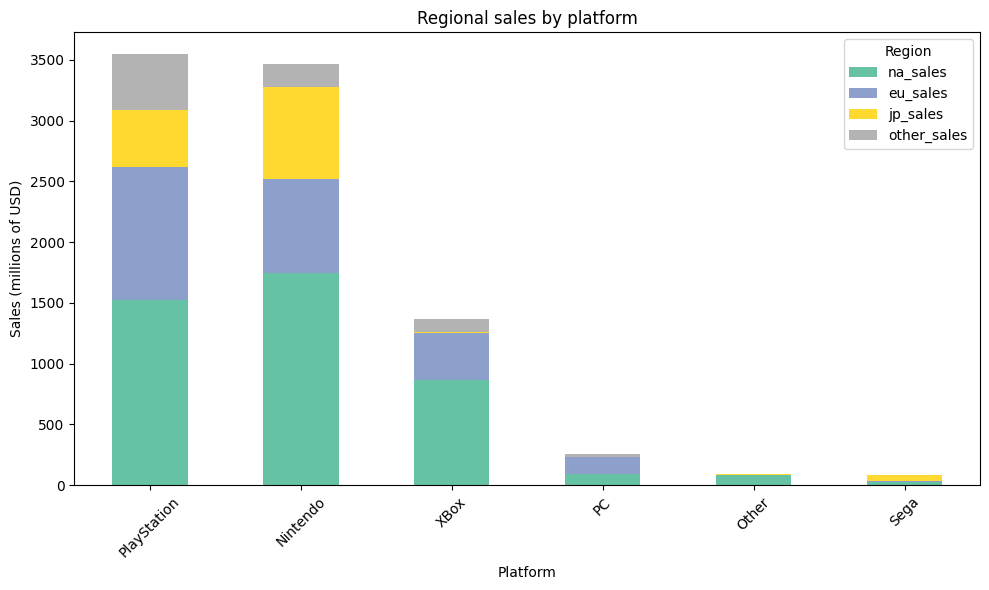

In [53]:
#Hacer una gráfica de barras para visualmente ver cómo se comportan las ventas por región.

# Ordenar por total combinado
sales_per_region['total_sales'] = sales_per_region.sum(axis=1)
sales_per_region = sales_per_region.sort_values('total_sales', ascending=False)
sales_per_region = sales_per_region.drop(columns='total_sales') 

# Crear gráfica de barras apiladas
sales_per_region.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Regional sales by platform')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of USD)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
print(sales_per_region.describe().round(1))

       na_sales  eu_sales  jp_sales  other_sales
count       6.0       6.0       6.0          6.0
mean      723.7     400.0     215.0        130.4
std       774.6     446.4     322.8        178.2
min        28.2       4.9       0.2          0.8
25%        83.9      41.6       5.8          6.5
50%       481.6     259.9      29.0         64.7
75%      1362.2     675.9     363.8        169.2
max      1743.7    1092.0     758.1        461.3


Aquí podemos ver cómo la plataforma que tiene más ventas es Play Station, seguida de Nintendo. Además, la región más importante para la venta de videojuegos es Norteamérica y en segundo lugar está el mercado europeo. En Europa, Play Station es más popular, pero en Japón, es Nintendo.

#### **2. Principales géneros por región**

Ahora haré el mismo análisis, pero para evaluar los géneros.

In [55]:
# Agrupar ventas por región por género
sales_per_genre = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
print(sales_per_genre)

              na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action          863.17    510.99    160.14       182.22
Adventure       101.52     63.20     52.24        16.37
Fighting        220.51     99.00     87.28        35.87
Misc            399.57    210.60    107.02        73.10
Platform        444.44    199.39    130.71        51.01
Puzzle          121.13     49.78     56.68        12.30
Racing          355.86    234.30     56.61        75.39
Role-Playing    330.04    188.24    352.62        59.41
Shooter         584.83    314.52     38.68       103.33
Simulation      180.40    113.35     63.64        30.57
Sports          671.20    371.32    134.93       132.21
Strategy         67.75     44.79     49.30        10.73
not defined       1.78      0.53      0.00         0.08


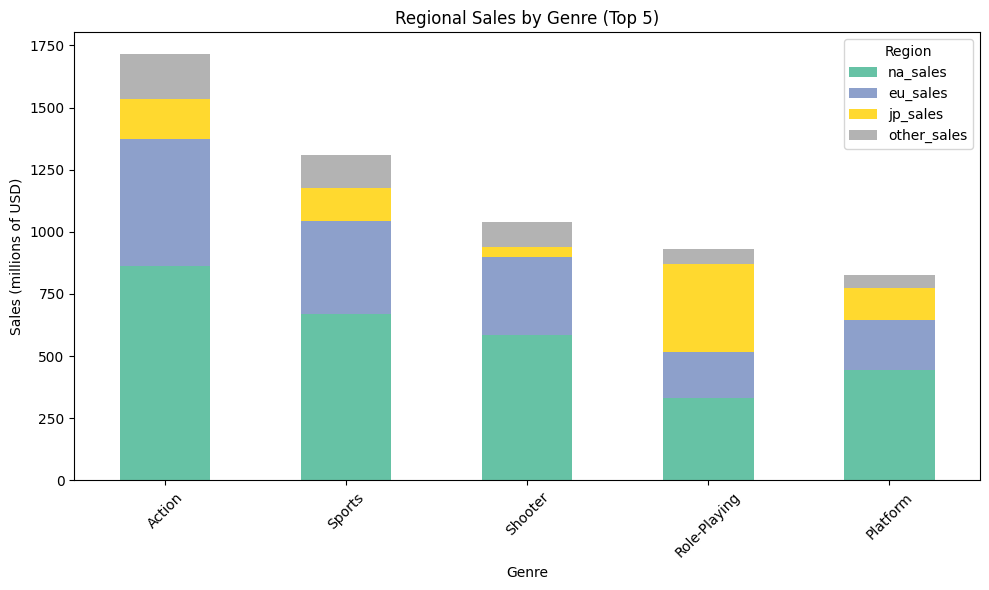

In [56]:
#Hacer una gráfica de barras solo con los 5 géneros con mayores ventas.

# Ordenar por total combinado
sales_per_genre['total_sales'] = sales_per_genre.sum(axis=1)
top5_genres = sales_per_genre.sort_values('total_sales', ascending=False).head(5)
top5_genres = top5_genres.drop(columns='total_sales')

# Crear gráfica de barras apiladas
top5_genres.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Regional Sales by Genre (Top 5)')
plt.xlabel('Genre')
plt.ylabel('Sales (millions of USD)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Action es, con diferencia, el género más rentable a nivel global. Lidera las ventas en todas las regiones, especialmente en Norteamérica y Europa. Sports y Shooter también se destacan con ventas muy elevadas, principalmente en Norteamérica y Europa. Aunque géneros como Role-Playing no están entre los cinco más rentables globalmente, en Japón dominan por un amplio margen. Esto evidencia cómo las preferencias regionales influyen significativamente en las ventas. 

In [57]:
#ordenar por total de ventas para identificar a los géneros más y menos rentables
sales_per_genre_sorted = sales_per_genre.sort_values('total_sales', ascending=False)

# Mostrar tabla:
print("\nVentas totales por género:")
print(sales_per_genre_sorted[['total_sales']])


Ventas totales por género:
              total_sales
genre                    
Action            1716.52
Sports            1309.66
Shooter           1041.36
Role-Playing       930.31
Platform           825.55
Misc               790.29
Racing             722.16
Fighting           442.66
Simulation         387.96
Puzzle             239.89
Adventure          233.33
Strategy           172.57
not defined          2.39


In [58]:
# Mostrar estadísticas generales de las ventas por género
print("\nEstadísticas descriptivas de ventas totales por género:")
print(sales_per_genre_sorted['total_sales'].describe().round(1))


Estadísticas descriptivas de ventas totales por género:
count      13.0
mean      678.0
std       495.9
min         2.4
25%       239.9
50%       722.2
75%       930.3
max      1716.5
Name: total_sales, dtype: float64


Después de evaluar a los géneros más rentables (Action, Sports, Shooter, Role-Paying y Platform), vemos que Strategy, Puzzle, y Adventure muestran consistentemente los niveles más bajos de ventas en todas las regiones. Esto sugiere que, si bien pueden tener valor de nicho, no representan géneros con alto rendimiento comercial global.

#### **3. Clasificaciones de ESBR**

In [59]:
# Agrupar ventas por región para cada clasificación ESRB
sales_per_rating = games.groupby('rating_description')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
print(sales_per_rating)

                    na_sales  eu_sales  jp_sales  other_sales
rating_description                                           
Adults Only             1.26      0.61      0.00         0.09
Early Childhood         1.53      0.11      0.00         0.11
Everyone             1276.80    704.13    199.42       231.57
Everyone 10+          345.50    183.35     40.20        71.93
Mature 17+            742.89    480.00     63.58       176.06
Pending              1227.62    610.21    835.97       149.96
Teens 13+             746.60    421.60    150.68       152.87


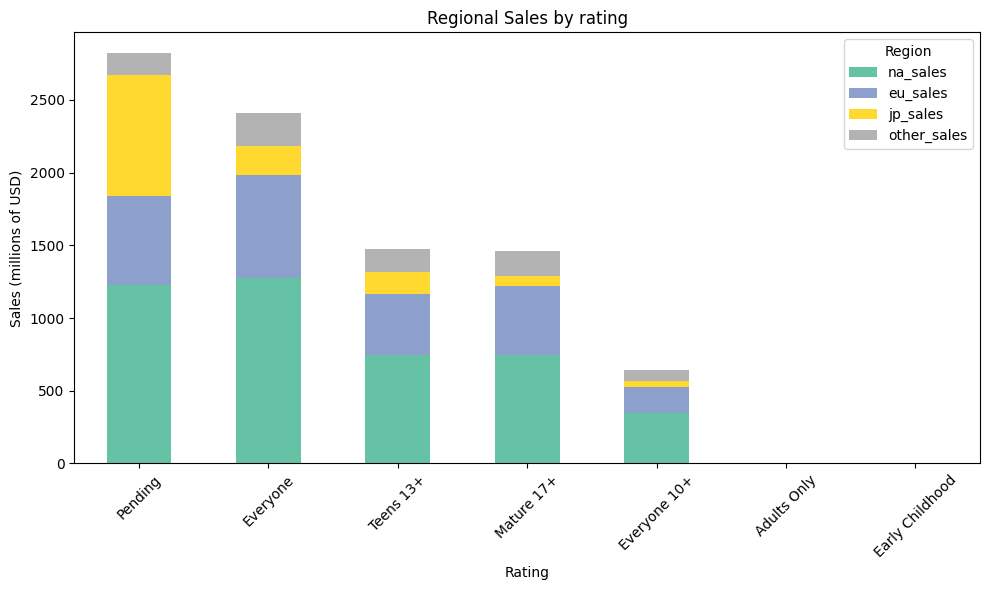

In [60]:
# Ordenar por total combinado
sales_per_rating['total_sales'] = sales_per_rating.sum(axis=1)
sales_per_rating = sales_per_rating.sort_values('total_sales', ascending=False)
sales_per_rating = sales_per_rating.drop(columns='total_sales') 

# Crear gráfica de barras apiladas
sales_per_rating.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Regional Sales by rating')
plt.xlabel('Rating')
plt.ylabel('Sales (millions of USD)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Norteamérica y Europa venden más juegos que son clasificados para todas las edades, seguido de juegos para mayores de 13 y mayores de 17 años. Por su parte, Japón tiene una gran lista de juegos sin clasificar. Esto podría deberse a que probablemente el país nipón no esté alineado al sistema ESBR estadounidene, ya que ellos cuentan con su propio sistema oficial de clasificación de videojuegos. Entonces podría ser que sus ventas sí se hayan visto afectadas por esta clasificación y por eso los dejaron de clasificar. 

#### **4. Cúantos juegos fueron lanzados por año**

Clasificar cuántos juegos fueron lanzados por año y ver su comportamiento y ver si son significativos los datos de cada periodo. 

In [61]:
#Contar cuántos videojuegos fueron lanzados por año de lanzamiento
games_per_year = games.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     337
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:title={'center':'Games released per year'}, xlabel='Year', ylabel='Number of games'>

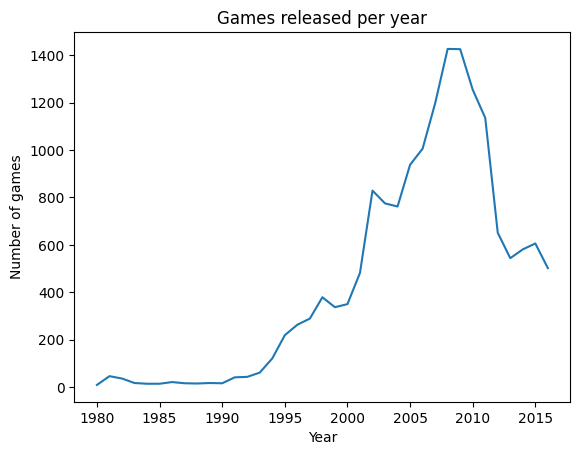

In [62]:
#visualizar
games_per_year.plot(
    title='Games released per year',
    xlabel='Year',
    ylabel='Number of games'
)

Existe una tendencia alcista en el lanzamiento de juegos, que alcanzó su pico más alto en el 2008. Sin embargo, a partir de ahí se presenta una fuerte tendencia a la baja que se puede explicar por diversos factores: la crisis financiera global, un salto tecnológico hacia consolas y juegos más sofisticados que alargó los tiempos de lanzamiento; y la llegada de  juegos móviles, que debió impactar en las ventas de juegos de consolas. 

#### **5. Ventas por plataforma por año**

In [63]:
from textwrap import fill
#agregar los datos
sales_per_platform = games.pivot_table(
    index = 'year_of_release',
    columns = 'platform_group',
    values = 'total_sales',
    aggfunc = 'sum',
    fill_value= 0
)

sales_per_platform

platform_group,Nintendo,Other,PC,PlayStation,Sega,XBox
year_of_release,,,,,,
1980,0.00,11.38,0.00,0.00,0.00,0.00
1981,0.00,35.68,0.00,0.00,0.00,0.00
1982,0.00,28.88,0.00,0.00,0.00,0.00
1983,10.96,5.84,0.00,0.00,0.00,0.00
1984,50.08,0.27,0.00,0.00,0.00,0.00
1985,53.46,0.45,0.04,0.00,0.00,0.00
1986,36.41,0.67,0.00,0.00,0.00,0.00
1987,19.76,1.94,0.00,0.00,0.00,0.00
1988,46.44,0.74,0.03,0.00,0.00,0.00


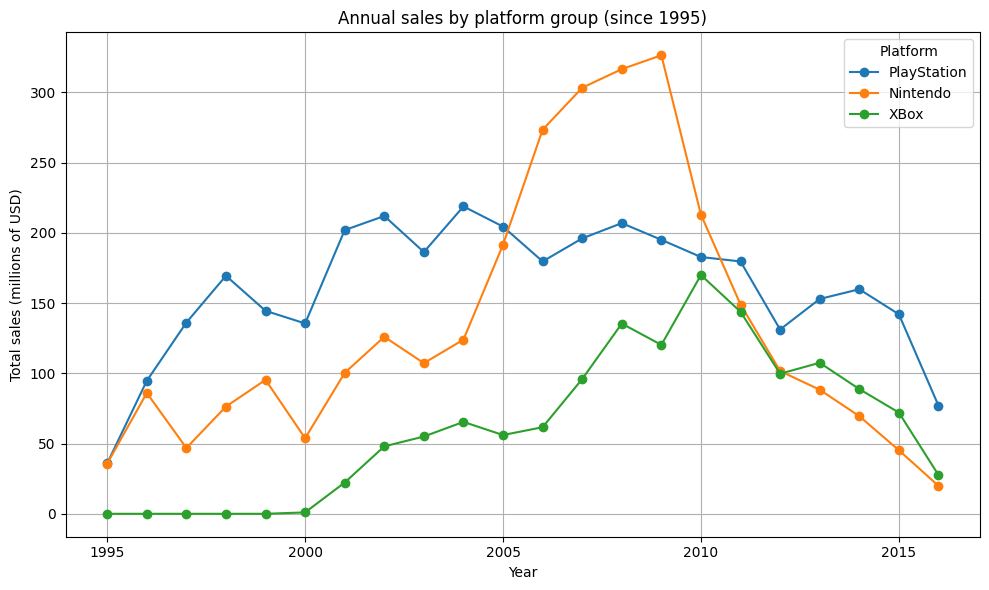

In [64]:
#Graficar
# Filtrar desde el año 1995, ya que es cuando se tienen más datos
sales_per_platform = sales_per_platform[sales_per_platform.index >= 1995]

# Seleccionar solo las plataformas relevantes
selected_platforms = ['PlayStation', 'Nintendo', 'XBox']
sales_per_platform = sales_per_platform[selected_platforms]

# Graficar línea temporal
sales_per_platform.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Annual sales by platform group (since 1995)')
plt.xlabel('Year')
plt.ylabel('Total sales (millions of USD)')
plt.legend(title='Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

A pesar de que Nintendo tuvo un pico importante de sus ventas, la caída fue mucho más estrepitosa. En cambio se puede ver que PlayStation ha tenido mayor estabilidad a lo largo del tiempo, con picos y valles, pero mucho más moderados. Xbox es la tercera plataforma con mayores ventas.

#### **6. Evaluación de las reseñas**

Evaluar cómo las reseñas de usuarios y de los profesionales de la industria, afectan las ventas de PlayStation. Crear un gráfico de dispersión y calcular la correlación.

In [65]:
# Filtrar datos de PlayStation y eliminar valores nulos
ps_data = games[
    (games['platform_group'] == 'PlayStation') &
    (games['critic_score'].notna()) &
    (games['user_score'].notna()) &
    (games['total_sales'].notna())
]

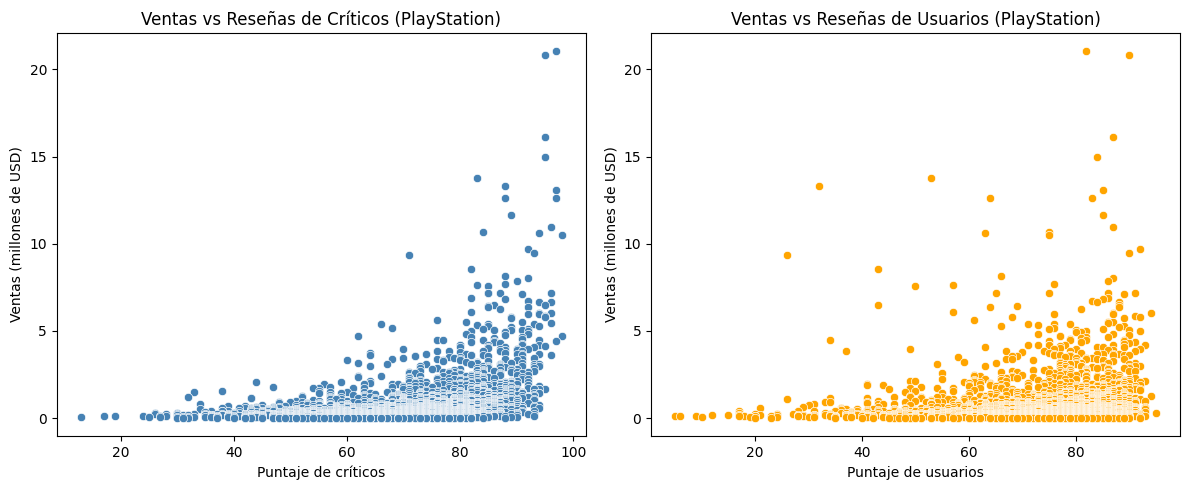

In [66]:
# Crear scatter plot: Crítica vs Ventas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps_data, x='critic_score', y='total_sales', color='steelblue')
plt.title('Ventas vs Reseñas de Críticos (PlayStation)')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas (millones de USD)')

# Crear scatter plot: Usuarios vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps_data, x='user_score', y='total_sales', color='orange')
plt.title('Ventas vs Reseñas de Usuarios (PlayStation)')
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas (millones de USD)')

plt.tight_layout()
plt.show()

In [67]:
# Calcular correlaciones de las ventas
corr_critic = ps_data['critic_score'].corr(ps_data['total_sales'])
corr_user = ps_data['user_score'].corr(ps_data['total_sales'])

print(f"Correlación entre reseñas de críticos y ventas: {corr_critic:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {corr_user:.2f}")

Correlación entre reseñas de críticos y ventas: 0.40
Correlación entre reseñas de usuarios y ventas: 0.13


Tanto en el gráfico, como en el dato de correlación (0.4), es más evidente que la correlación es más alta entre los críticos y las ventas totales, que entre las reseñas de los usuarios y las ventas. Es decir, que la calificación que pueden llegar a dar los usuarios incide poco o casi nada en las ventas de los videojuegos. 

Debido a que hay valores(juegos) que sobresalen, tomaré algún ejemplo para evaluar más puntual. 

In [68]:
# Ordenar por ventas más altas
top_sales_ps = ps_data.sort_values('total_sales', ascending=False).head(10)

# Mostrar tabla de juegos más vendidos
print("Juegos de PlayStation con mayores ventas:")
print(top_sales_ps[['name', 'critic_score', 'user_score', 'total_sales']])

Juegos de PlayStation con mayores ventas:
                             name  critic_score  user_score  total_sales
16             grand theft auto v          97.0        82.0        21.05
17   grand theft auto san andreas          95.0        90.0        20.81
24     grand theft auto vice city          95.0        87.0        16.15
28           gran turismo 3 aspec          95.0        84.0        14.97
34      call of duty black ops ii          83.0        53.0        13.79
37  call of duty modern warfare 3          88.0        32.0        13.33
38           grand theft auto iii          97.0        85.0        13.10
41         call of duty black ops          88.0        64.0        12.63
42             grand theft auto v          97.0        83.0        12.62
48                 gran turismo 4          89.0        85.0        11.65


Tomaré el juego de 'grand theft auto v ', ya que tiene las ventas más altas y de las mejores reseñas. De esta forma puedo comparar si realmente las reseñas tienen alguna incidencia sobre las ventas, o tiene que ver con otros factores propios de cada plataforma.

In [83]:
# Filtrar solo las entradas del juego "grand theft auto v"
grand_auto = games[
    games['name'].str.lower() == 'grand theft auto v'
][['platform', 'critic_score', 'user_score', 'total_sales']]

# Verificar las filas encontradas
print("Plataformas donde fue lanzado 'grand theft auto v':")
print(grand_auto)

Plataformas donde fue lanzado 'grand theft auto v':
     platform  critic_score  user_score  total_sales
16        PS3          97.0        82.0        21.05
23       X360          97.0        81.0        16.27
42        PS4          97.0        83.0        12.62
165      XOne          97.0        79.0         5.47
1730       PC          96.0        79.0         1.17


In [84]:
# Calcular la matriz de correlación
correlation = grand_auto[['critic_score', 'user_score', 'total_sales']].corr()
print("Matriz de correlación:")
print(correlation)

Matriz de correlación:
              critic_score  user_score  total_sales
critic_score      1.000000    0.562500     0.706069
user_score        0.562500    1.000000     0.771171
total_sales       0.706069    0.771171     1.000000


Ahora podemos ver de manera más clara, que la calificación de los críticos tiene una incidencia de 0.7 sobre las ventas, mientras que la calificación de los usuarios influye en 0.77, es decir, que en este juego en específico, ha pesado más la calificación de los usuarios, que la de los críticos. 

## **Pruebas de hipótesis**

#### **Prueba de hipótesis 1**

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [72]:
#Prueba: prueba t de Student para muestras independientes, comparando las calificaciones de usuarios entre Xbox One y PC
#establecer los datos para demostrar la hipótesis
#como tenemos muchos valores ausentes en la columna 'user_score', tenemos que quitarlos

xbox = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

In [73]:
alpha= 0.05

#Prueba Levene para igualdad de varianzas
levene_stat, levene_p = st.levene(xbox, pc)
print('Prueba de Levene - valor p:', levene_p)

#Basado en eso decido el parámetro equal_var
if levene_p < alpha:
    print("Varianzas desiguales: usamos equal_var=False")
    equal_var = False
else:
    print("Varianzas iguales: usamos equal_var=True")
    equal_var = True

Prueba de Levene - valor p: 0.2787984933367411
Varianzas iguales: usamos equal_var=True


In [74]:
#Considerando que salió equal_var= True, esa utilizamos:
results = st.ttest_ind(xbox, pc, equal_var= True)

print('Valor p:', results.pvalue) #extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p: 1.4016223685119627e-05
Rechazamos la hipótesis nula


In [75]:
print("Media Xbox:", xbox.mean().round(1))
print("Media PC:", pc.mean().round(1))

Media Xbox: 65.2
Media PC: 70.6


Rechazamos la hipótesis nula, es decir, las calificaciones promedio para las plataformas XOne y PC no son las mismas. Al imprimir las medias, reafirmamos que éstas no son iguales.

#### **Prueba de hipótesis 2**

H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [76]:
#Prueba: prueba t de Student para muestras independientes, comparando las calificaciones de usuarios para diferentes géneros.
#establecer los valores para demostrar la hipótesis

action = games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score']

In [77]:
alpha= 0.05

#Prueba Levene para igualdad de varianzas
levene_stat, levene_p = st.levene(action, sports)
print('Prueba de Levene - valor p:', levene_p)

#Basado en eso decido el parámetro equal_var
if levene_p < alpha:
    print("Varianzas desiguales: usamos equal_var=False")
    equal_var = False
else:
    print("Varianzas iguales: usamos equal_var=True")
    equal_var = True

Prueba de Levene - valor p: 9.39210274080246e-05
Varianzas desiguales: usamos equal_var=False


In [78]:
#Considerando que salió equal_var= False, esa utilizamos:
results = st.ttest_ind(action, sports, equal_var= False)

print('Valor p:', results.pvalue) #extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p: 0.07751671595536654
No podemos rechazar la hipótesis nula


In [79]:
print("Media Action:", action.median().round(1))
print("Media Sports:", sports.median().round(1))

Media Action: 74.0
Media Sports: 74.0


No podemos rechazar la hipótesis nula, por tanto, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. Al imprimir el dato para obtener la mediana de cada uno, vemos que son iguales, por lo que se puede interpretar que son géneros que gustan de la misma forma entre los usuarios.

## **Conclusiones generales**

Del análisis realizado, se observa que PlayStation lidera en volumen de ventas globales, a pesar de haber ingresado al mercado después de Nintendo. Sus ventas han sido más estables y sostenidas, a diferencia de la alta volatilidad de Nintendo, explicada en parte por lanzamientos esporádicos de gran impacto seguidos de periodos con menor actividad.

A nivel regional, Norteamérica representa el mercado con mayores ingresos, seguido por Europa. Japón, aunque históricamente relevante, es un mercado más acotado en volumen. En cuanto a géneros, *Action* es el más rentable globalmente, seguido por *Sports* y *Shooter*, con un dominio claro en Norteamérica y Europa. En Japón, en cambio, predomina el género *Role-Playing*, evidenciando diferencias culturales clave. Géneros como *Strategy*, *Puzzle* y *Adventure* registran las ventas más bajas a nivel mundial.

También se identifica una tendencia alcista en lanzamientos hasta 2008, seguida por una baja sostenida. Esta caída se asocia a la crisis financiera global, al salto tecnológico hacia consolas más sofisticadas que extendió los ciclos de desarrollo, y al crecimiento de los juegos móviles, que desplazaron parte del mercado. Finalmente, según el tipo de juego, la crítica especializada y la opinión de los usuarios pueden influir significativamente en su éxito comercial.